In [8]:
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [9]:
import pandas as pd
from bs4 import BeautifulSoup
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
samples = ['wtnuc','wtcyt','mutnuc','mutcyt']
data = {}
genename = {}

for sample in samples:
    data[sample] = {}
    
    filename = "boyle/%s.html" % sample
    
    # load in an object that stores HTML data
    soup = BeautifulSoup(open(filename), "html.parser")

    # get all tables from HTML
    tables = soup.findAll("table")
    
    # for storing data
    tablesdata = []

    # loop through tables
    for table in tables:
        tabledata = []
        
        # loop on rows in the table which have the 'tr' tag
        for tr in table.findAll('tr'):
            rowdata = []
            
            # loop on elements in the table
            for td in tr.findAll('td'):

                # store data in a list
                rowdata.append(td.text)
            
            # add data from row to list for table
            tabledata.append(rowdata)
            
        # add table to list of tables
        tablesdata.append(tabledata)
    
    # now parse out the tables we want
    for table in tablesdata:
        try:
            if table[0][0] == 'U':
                r = table[0]
                gid = r[1]
                if gid != 'flag':
                    dataval = float(r[3])
                    data[sample][gid] = dataval
                    name = r[8]
                    genename[name] = name
        except:
            pass


In [27]:
df = pd.DataFrame.from_dict(data)
df = df.fillna(0)
df = df.div(df.max(axis=1), axis=0)

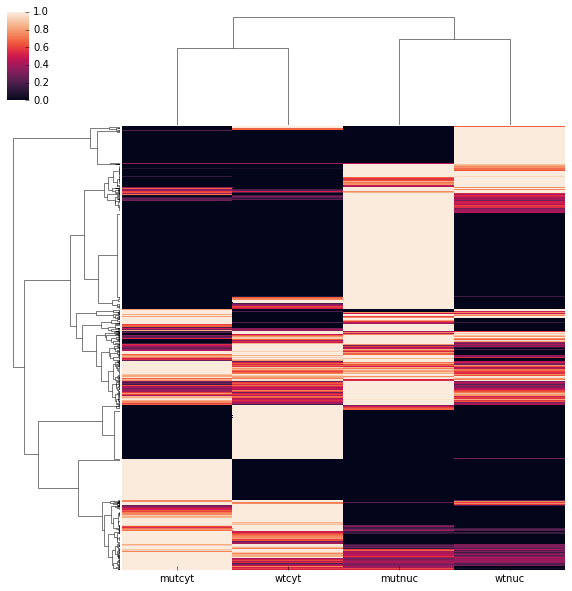

In [28]:
sns.clustermap(df, metric='cosine', method='average', xticklabels = True, yticklabels = False)

In [29]:
df

,mutcyt,mutnuc,wtcyt,wtnuc
gi|10047138|ref|NP_06,1.000000,0.000000,0.000000,0.666667
gi|10047140|ref|NP_06,0.000000,1.000000,0.000000,0.000000
gi|100913206|ref|NP_0,1.000000,0.553571,0.741071,0.321429
gi|10140845|ref|NP_06,0.000000,1.000000,0.000000,0.000000
gi|10190686|ref|NP_06,0.000000,0.000000,1.000000,0.000000
gi|101943240|ref|NP_0,0.000000,0.636364,0.000000,1.000000
gi|102469034|ref|NP_0,0.000000,1.000000,0.000000,0.000000
gi|103471997|ref|NP_0,0.666667,1.000000,0.000000,0.000000
gi|103471999|ref|NP_0,0.000000,0.600000,0.000000,1.000000
gi|103472005|ref|NP_0,0.000000,0.000000,0.000000,1.000000
